In [24]:
import os
import cv2
import numpy as np
import tkinter as tk
from tkinter import messagebox
import pandas as pd
from matplotlib import pyplot as plt

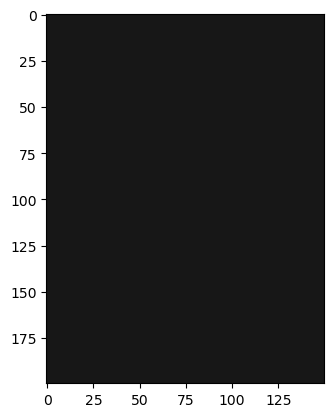

In [25]:
#show image
#converting from BGR to RGB as other libraries like matplotlib require RGB
image = cv2.cvtColor(cv2.imread(r'C:\Users\Sambhavi Roy\Downloads\archive (1)\training_dataset\black\black18.png'), cv2.COLOR_BGR2RGB) 
plt.imshow(image)

In [26]:
rgb = []
color = []

for dirname, _, filenames in os.walk(r'C:\Users\Sambhavi Roy\Downloads\archive (1)\training_dataset'): #iterating through directory
    for filename in filenames:
        image = cv2.cvtColor(cv2.imread(os.path.join(dirname, filename)), cv2.COLOR_BGR2RGB)#converting BGR to RGB
        rgb.append(image[0][0]) #extracting color of 1st pixel
        color.append(dirname[61:])

In [27]:
rgb_df = pd.DataFrame(np.array(rgb), columns=['red', 'green', 'blue']) #converting list to numpy array for easier operations,indexing
rgb_df.head()

,red,green,blue
0,10,5,2
1,17,0,17
2,29,24,23
3,47,47,47
4,28,29,33


In [28]:
color_df = pd.DataFrame(
    {
        'color': color
    }
)

color_df.head()

,color
0,black
1,black
2,black
3,black
4,black


In [29]:
df = rgb_df.join(color_df)
df.head()

,red,green,blue,color
0,10,5,2,black
1,17,0,17,black
2,29,24,23,black
3,47,47,47,black
4,28,29,33,black


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   red     250 non-null    uint8 
 1   green   250 non-null    uint8 
 2   blue    250 non-null    uint8 
 3   color   250 non-null    object
dtypes: object(1), uint8(3)
memory usage: 2.8+ KB


Calculating Distance

In [31]:
def matching_color(R, G, B):
    min = 100000 #any large number
    for i in range(len(df)):
        d = abs(R - int(df.loc[i, "red"])) + abs(G - int(df.loc[i, "green"])) + abs(B - int(df.loc[i, "blue"]))
        if d <= min:
            min = d
            mcol = df.loc[i, "color"]
    return mcol

Testing for some value

In [32]:
matching_color(0, 20, 200)

'blue'

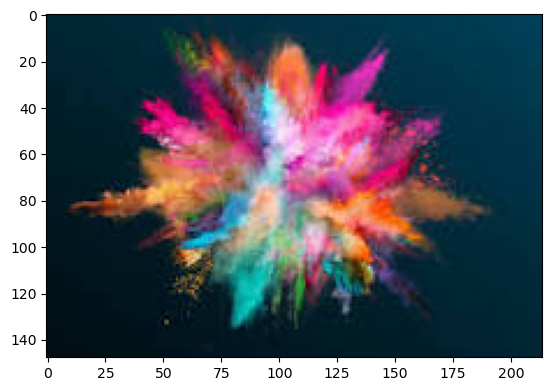

In [33]:
img = cv2.cvtColor(cv2.imread(r'C:\Users\Sambhavi Roy\Downloads\colored.jpg'), cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [34]:
img.shape

(148, 214, 3)

In [35]:
# declaring global variables 
clicked = False
r = g = b = x_pos = y_pos = 0

In [36]:
# getting value of x & y of mouse click
def draw_function(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDBLCLK: #for double click
        global b, g, r, x_pos, y_pos, clicked
        clicked = True
        x_pos = x
        y_pos = y
        b, g, r = img[y, x] #opencv notation reverse of cartesian
        b = int(b)
        g = int(g)
        r = int(r)


In [37]:
cv2.namedWindow('image')
cv2.setMouseCallback('image', draw_function)

while True:

    cv2.imshow("image", img)
    if clicked:

        # cv2.rectangle(image, start point, endpoint, color, thickness) -1 fills entire rectangle
        cv2.rectangle(img, (20, 20), (750, 60), (b, g, r), -1)

        # Prints color name with RGB values
        text = matching_color(r, g, b) + ' R=' + str(r) + ' G=' + str(g) + ' B=' + str(b)

        # cv2.putText(img,text,start,font(0-7),fontScale,color,thickness,lineType--> 3types- 4, 8, AA )
        cv2.putText(img, text, (50, 50), 2, 0.8, (255, 255, 255), 2, cv2.LINE_4)

        clicked = False

    # Break the loop when user hits 'esc' key (ASCII value 27)
    if cv2.waitKey(20) & 0xFF == 27: #Waits for a key press event with a delay of 20 milliseconds. This delay allows the display window to refresh properly and prevents it from freezing
        break

cv2.destroyAllWindows()